## Домашнее задание 2

Дедлайн — ***6.09.18 12:00***. 

Выполненные задания можно присылать на почту zueva.nn@phystech.edu либо загружать в папку в своем репозитории.

В этом задании предлагается продолжить то, что мы начали делать на семинаре — принять участие в соревновании на платформе 'Kaggle'!

Мы будем работать с  уже знакомым нам соревнованием **House Prices: Advanced Regression Techniques**: 

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Задачей является предсказание цены дома по большому набору фич. Вам необходимо обучиться на `train.csv` и отправить свои предсказания для данных, которые лежат в `test.csv`. Все данные находятся в папке **Seminars/Seminar2**. Там же можно найти `baseline solutions` — базовые и простые решения без особых надстроек.


### Часть 1

1. Если вы еще не зарегистрированы на платформе `Kaggle`, то это можно сделать здесь: www.kaggle.com.
   Регистрация нужна для того, чтобы Ваши посылки были привязаны к конкретному аккаунту. 
2. После регистрации на ресурсе нужно стать участником соревнования: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
3. После того, как вы зарегистрировались на участие в конкретном соревновании, вы готовы работать с данными. Обычно их можно скачать в разделе `Data`, но данные оттуда уже лежат в папке **Seminars/Seminar2**.

### Часть 2

Как только вы зарегистрировались и скачали данные, можно приступать к работе с ними.
1. Загрузите данные с помощью функций из пакета `Pandas` read_csv(). Обратите внимание на параметры — если у данных в первой строке стоят названия столбцов, то параметр **Header** нужно сделать истинным. Если данные вводятся через запятую, то параметру **sep** (separator) нужно передать символ `,`. Подробнее про параметры read_csv можно почитать здесь: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html. Как видите, их очень много и чтение файла можно настроить очень тонко

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_1 = pd.read_csv("train.csv")#загрузите сюда данные для тренировки
train=train_1
test = pd.read_csv("test.csv")#загрузите сюда данные для построения предсказаний
labels = train.SalePrice #сюда нужно загрузить метки

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [5]:
labels

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

С какими типами признаков вы столкнулись?


Ответ:

In [6]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

### Часть 3
Какие признаки выглядят бесполезными? Попробуйте выбросить некоторые фичи, опираясь на ваш личный жизненный опыт или алгоритмы `feature selection`. Подробнее про них можно прочитать здесь: http://scikit-learn.org/stable/modules/feature_selection.html

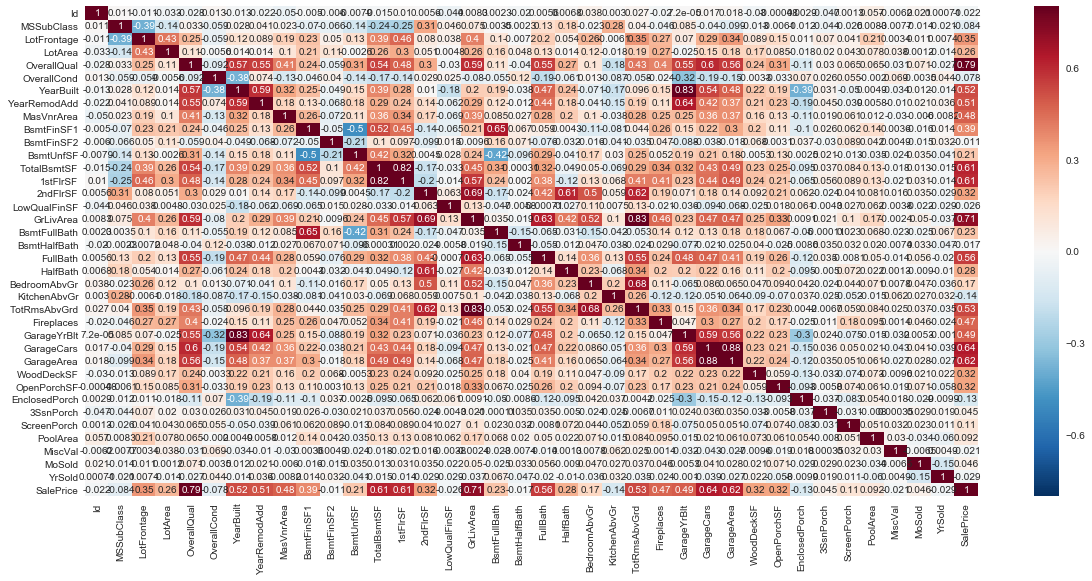

In [7]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

In [8]:
print("{0:15}\t{1}\t{2}".format("Name", "NaNs", "#unique"))
for col in train.columns:
    print("{0:15}\t{1:.2f}\t{2}".format(col, train[col].isnull().mean(), train[col].nunique()))

Name           	NaNs	#unique
Id             	0.00	1460
MSSubClass     	0.00	15
MSZoning       	0.00	5
LotFrontage    	0.18	110
LotArea        	0.00	1073
Street         	0.00	2
Alley          	0.94	2
LotShape       	0.00	4
LandContour    	0.00	4
Utilities      	0.00	2
LotConfig      	0.00	5
LandSlope      	0.00	3
Neighborhood   	0.00	25
Condition1     	0.00	9
Condition2     	0.00	8
BldgType       	0.00	5
HouseStyle     	0.00	8
OverallQual    	0.00	10
OverallCond    	0.00	9
YearBuilt      	0.00	112
YearRemodAdd   	0.00	61
RoofStyle      	0.00	6
RoofMatl       	0.00	8
Exterior1st    	0.00	15
Exterior2nd    	0.00	16
MasVnrType     	0.01	4
MasVnrArea     	0.01	327
ExterQual      	0.00	4
ExterCond      	0.00	5
Foundation     	0.00	6
BsmtQual       	0.03	4
BsmtCond       	0.03	4
BsmtExposure   	0.03	4
BsmtFinType1   	0.03	6
BsmtFinSF1     	0.00	637
BsmtFinType2   	0.03	6
BsmtFinSF2     	0.00	144
BsmtUnfSF      	0.00	780
TotalBsmtSF    	0.00	721
Heating        	0.00	6
HeatingQC      	0.00	5
Ce

In [9]:
train_ = pd.get_dummies(train)

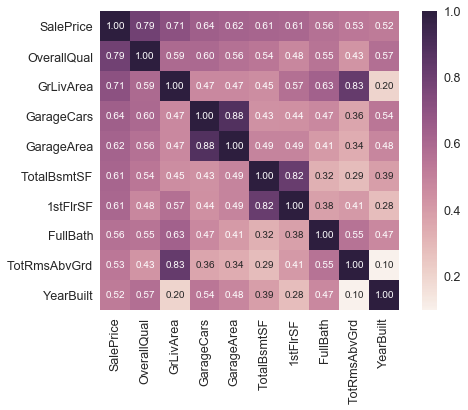

In [10]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
sns.plt.yticks(rotation=0)
sns.plt.xticks(rotation=90)
sns.plt.show()

In [11]:
X_train = train_1.drop(["Id","SalePrice","PoolQC","MiscFeature","Fence","Alley"],axis = 1 )

In [12]:
X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna('NA')
X_train['GarageType'] = X_train['GarageType'].fillna('NA')
X_train['GarageFinish'] = X_train['GarageFinish'].fillna('NA')
X_train['GarageCond'] = X_train['GarageCond'].fillna('NA')
X_train['GarageQual'] = X_train['GarageQual'].fillna('NA')
X_train['BsmtExposure'] = X_train['BsmtExposure'].fillna('NA')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].fillna('NA')
X_train['BsmtCond'] = X_train['BsmtCond'].fillna('NA')
X_train['BsmtQual'] = X_train['BsmtQual'].fillna('NA')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].fillna('NA')
X_train['MasVnrType'] = X_train['MasVnrType'].fillna('NA')
X_train['Electrical'] = X_train['Electrical'].fillna(X_train['Electrical'].mode()[0])

In [13]:
X_train = X_train.select_dtypes(include=["object"])
X_train_non_ob = X_train.select_dtypes(exclude=["object"])
X_train_d = pd.get_dummies(X_train)
X_train.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
X_train_TR = pd.concat([X_train_non_ob, X_train_d], axis=1)
#переменные с помощью деревьев
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier()
clf = clf.fit(X_train_TR, labels.values.ravel())
model = SelectFromModel(clf, prefit=True)
x_TR = X_train_TR.columns[model.get_support()]
X_train_TR[x_TR].head()

,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_BrkSide,...,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_TA,GarageCond_TA,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial
0,1,0,0,1,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,1,0
1,1,0,0,1,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0
2,1,0,1,0,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,1,0
3,1,0,1,0,1,1,0,0,0,0,...,0,0,1,1,1,0,1,1,0,0
4,1,0,1,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,0,1,0


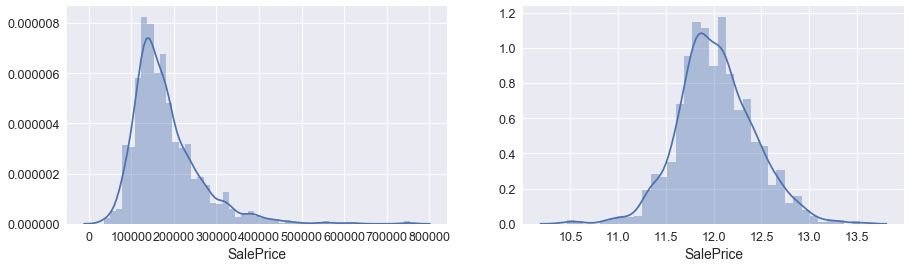

In [15]:
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 4))
sns.distplot(labels, ax=ax1)
sns.distplot(np.log1p(labels), ax=ax2)

In [16]:
print("Skewness: %f" % train["SalePrice"].skew())
print("Kurtosis: %f" % train["SalePrice"].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


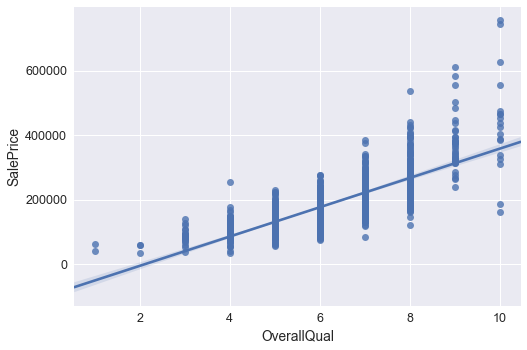

In [17]:
sns.regplot(train["OverallQual"], labels)

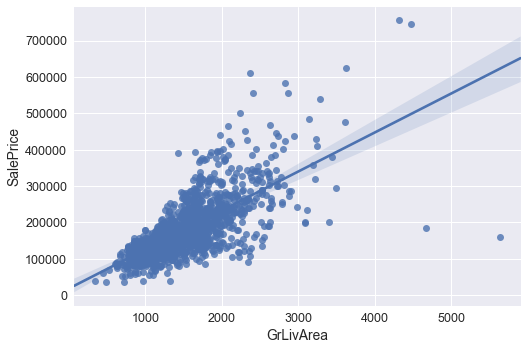

In [18]:
sns.regplot(train["GrLivArea"], labels)

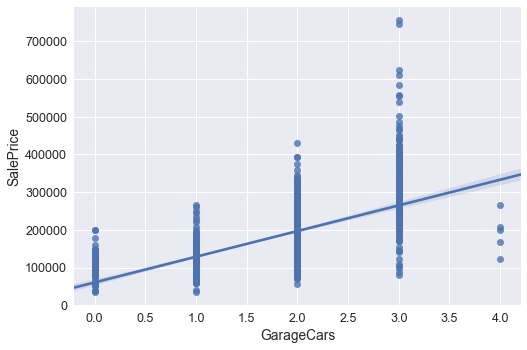

In [19]:
sns.regplot(train["GarageCars"], labels)

In [20]:
# меняем NaN
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])

test = test.drop((missing_data[missing_data["Total"] > 1]).index,1)
test.isnull().sum().max()

test["OverallQual"] = test["OverallQual"].fillna(0)
test["GrLivArea"] = test["GrLivArea"].fillna(0)
test["GarageCars"] = test["GarageCars"].fillna(0)
test["TotalBsmtSF"] = test["TotalBsmtSF"].fillna(0)
test["1stFlrSF"] = test["1stFlrSF"].fillna(0)
test["FullBath"] = test["FullBath"].fillna(0)
test["YearBuilt"] = test["YearBuilt"].fillna(0)

test.isnull().sum().max()

1

In [21]:
attr = ["OverallQual", "GrLivArea","GarageCars","TotalBsmtSF","1stFlrSF","FullBath","YearBuilt"]

In [22]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=0)


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regr = LinearRegression()   #регрессия
regr.fit(train_[attr], labels)
print(cross_val_score(regr, train_[attr], np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

-0.0314601272158


In [23]:
# randomforest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=37, n_estimators=45)
rf.fit(train_[attr], labels.values.ravel())
print(cross_val_score(rf, train_[attr], np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

-0.0280826533436


In [24]:
from sklearn.ensemble import   GradientBoostingRegressor
model_GB = GradientBoostingRegressor(learning_rate=0.05,
                                   max_depth=5, min_samples_leaf=12, 
                                   loss='huber', random_state = 9)
model_GB_cor=model_GB.fit(train_[attr], labels.values.ravel())
print(cross_val_score(model_GB_cor, train_[attr], np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

model_GB = GradientBoostingRegressor(learning_rate=0.05,
                                   max_depth=5, min_samples_leaf=11, 
                                   loss='huber', random_state = 9)

model_GB_TR=model_GB.fit(X_train_TR[x_TR], labels.values.ravel())
print(cross_val_score(model_GB_TR, X_train_TR[x_TR], np.log1p(labels), scoring="mean_squared_error", cv=cv).mean())

-0.025116376374
-0.0398504781677


In [25]:
score_GB = model_GB_cor.predict(test[attr]).ravel() 

In [26]:
score_GB

array([ 123921.71540574,  153119.23196921,  158947.30326467, ...,
        147802.70945076,  117446.39591949,  227704.3957085 ])

In [27]:
model_GB_cor.feature_importances_

array([ 0.24310158,  0.21367907,  0.05888505,  0.14082361,  0.11699143,
        0.01706099,  0.20945826])

In [28]:
test_data = pd.read_csv("test.csv")
test_Id = test_data['Id']
submit = pd.DataFrame()
submit['Id'] = test_Id.ravel()
submit['SalePrice'] = score_GB 
submit.to_csv('submission.csv',index=False)


### Часть 4
После того, как вы сформировали файл `submission.csv`, он появится в той же директории, где находится основной Jupyter Notebook. Далее его необходимо отправить в систему. Для этого нужно нажать на `Submit Predictions`.
Далее вы нажиматее `Upload Submission File` и отправляете туда `submission.csv` (сам код отправлять в этом соревновании не нужно!). После того, как Вы нажали `Submit`, Kaggle перенаправит вас на *Leader board*, где вы сможете увидеть свой *score* и место среди всех участников.
Будьте внимательны, нельзя делать больше 10 посылок в день!

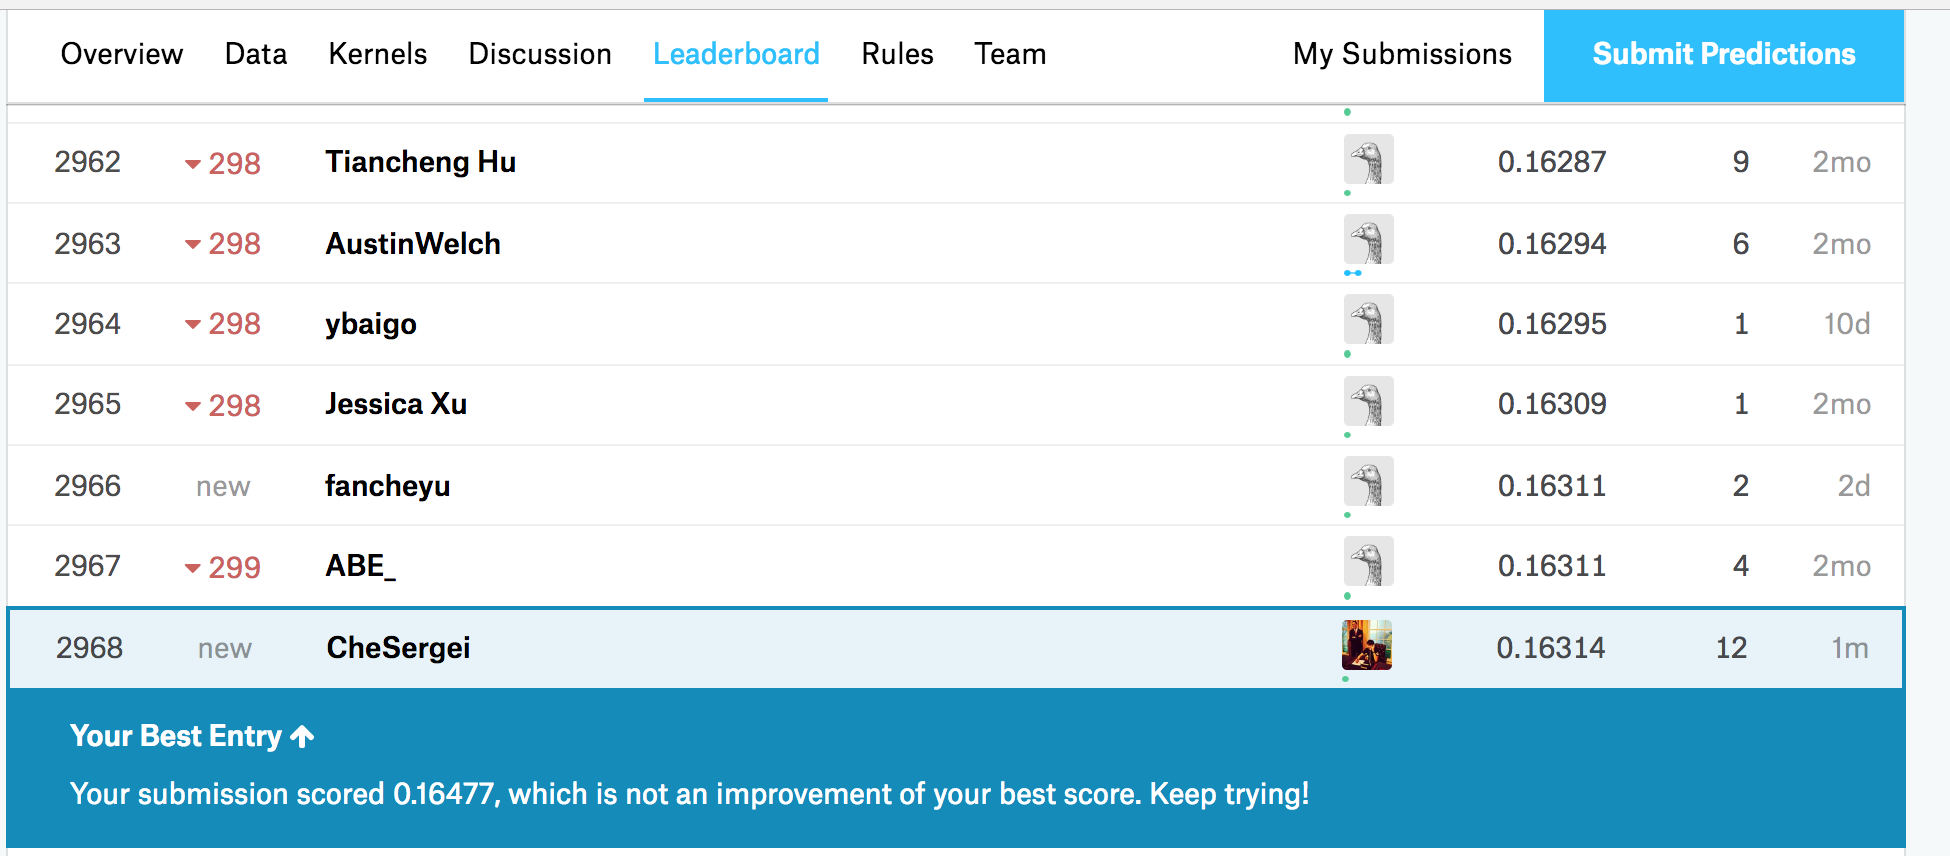

In [29]:
from IPython.display import Image
Image("3.png")